<a href="https://colab.research.google.com/github/b-guedes/Projetos-Portfolio/blob/main/Projeto_Limpeza_de_Dados_(Alvar%C3%A1s_Prefeitura_PoA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

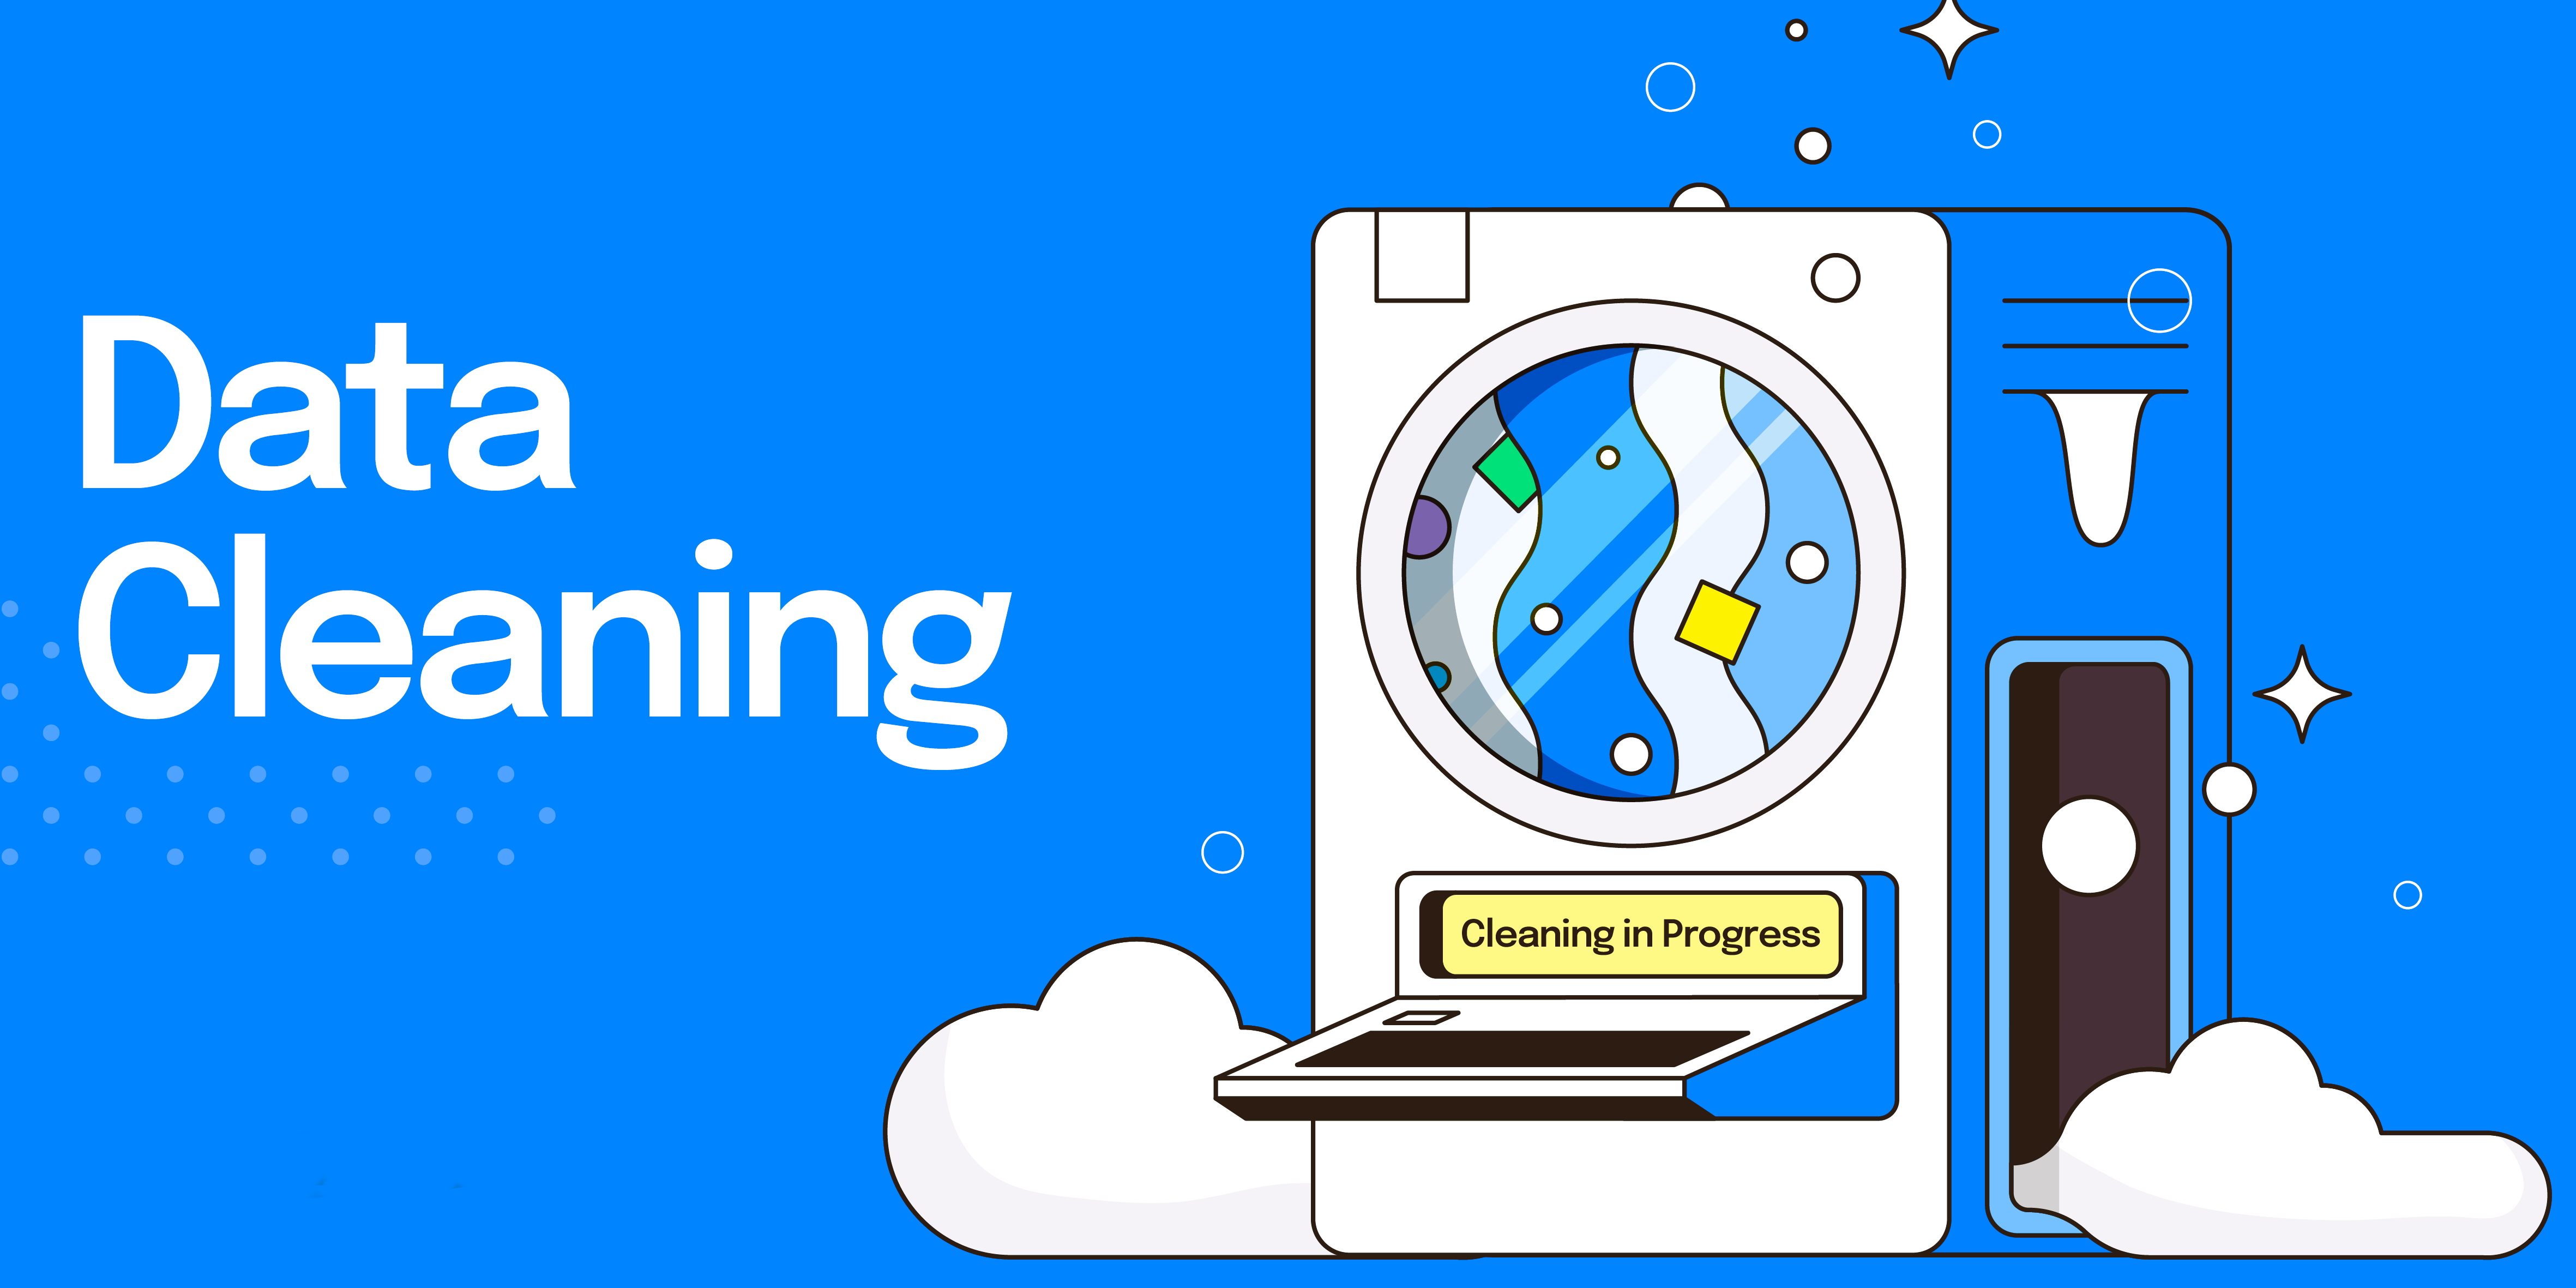

# **Limpeza de Dados em Python com Pandas**

Neste projeto, usaremos a linguagem Python para realizar a limpeza de dados de fonte pública. Será utilizado o pacote Pandas e NumPy e, posteriormente, disponibilizado o Dataset pronto na plataforma [Kaggle](https://www.kaggle.com/) em arquivo CSV para que ele possa ser utilizado em qualquer projeto.

## INTRODUÇÃO


Neste projeto será utilizado algumas técnicas de limpeza de dados (*Data Cleaning*) em um conjunto de dados, esta etapa é de suma importância para a Análise de Dados. É neste momento que um conjunto de dados passa por uma avaliação onde deve ser decidido se ele está pronto para responder às questões feitas, sejam de inteligência de negócios (*Business Intelligence*) ou aprendizado de máquina (*Machine Learning*), ou se ele precisa passar por adequações necessárias.


Por qual motivo essa etapa é tão necessária? A resposta para isso é a consequência da utilização desses dados, em outras palavras, se os dados brutos de um conjunto de dados conterem erros eles podem afetar a assertividade de previsões de negócio ou a precisão de modelos de *Machine Learning*, isto pode causar grandes impactos negativos nos negócios e organizações que dependem dessas informações.


Para evitar que isso aconteça é, então, necessário submeter os dados brutos à limpeza. As principais etapas desse momento incluem, mas não se limitam a:

**a)** identificar e remover informações duplicadas ou incorreta;

**b)** modificar e remover campos de dados incorretos ou incompletos e;

**c)** corrigir formatação, valores ausentes ou erros ortográficos.

É nesta parte do trabalho de um analista e/ou cientista de dados que o projeto será feito. Para isso será utilizado a linguagem [Python](https://colab.research.google.com/), em um notebook do [Google Colab](https://colab.research.google.com/), que capacita a automação da limpeza para qualquer atualização que o conjunto de dados possa sofrer.

## PROJETO

Para o projeto utilizarei um conjunto de dados público. Esse tipo de dado têm se tornado cada vez mais comum e vem ganhando importância para a sociedade, por exemplo, seja para que organizações possam analisar comportamentos da sociais ou para aprofundar e sincronizar objetivos de negócios de acordo com dados demográficos. Enfim, os usos são inúmeros e os tipos de dados podem ser muito diversos.

Neste projeto utilizaremos dados disponibilizados pela Prefeitura de Porto Alegre por meio do site [Dados Abertos PoA](https://dadosabertos.poa.br/) que agrega os dados disponibilizados em diferentes áreas como, por exemplo, administração e finanças, educação, indústria, comércio e serviços, saúde e entre outros.

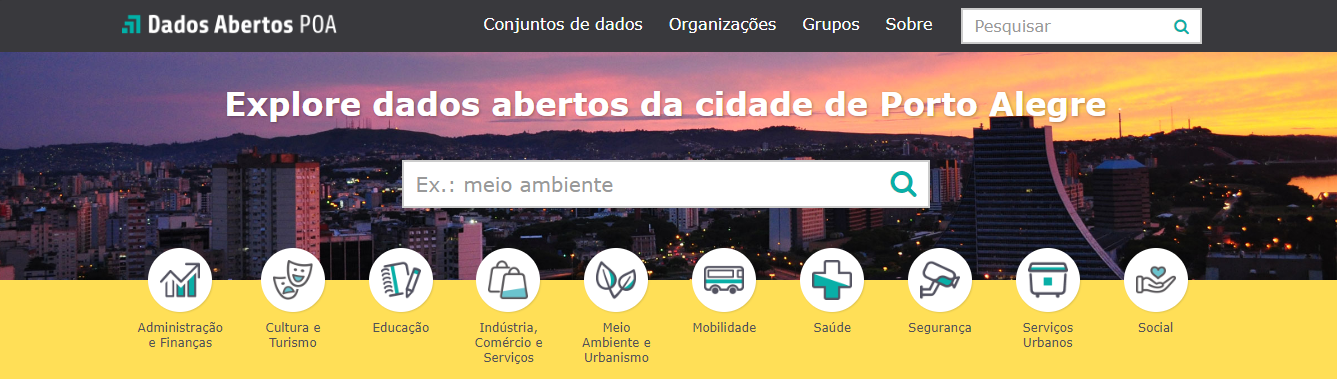


### Objetivos

Entre os dados disponíveis, foi escolhido um conjunto de dados com atualização constante, e traz diversos indicadores interessantes para entender os negócios presentes na cidade. Esse conjunto é o de Alvarás Ativos da cidade de Porto Alegre, com as devidas proteções aos dados respeitando a LGPD, nele constam as seguintes informações:



*   **data_extracao**: Data e hora da extração dos dados;
*   **alvara**: Número do alvará - dígito verificador;
*   **bairro**: Bairro do imóvel;
*   **codigo_logradouro**: Código do logradouro conforme o Cadastro de Logradouros da Prefeitura Porto Alegre;
*   **logradouro**: Nome do Logradouro do Imóvel;
*   **predio**: Número do imóvel;
*   **data_deferimento**: Data em que o alvará foi incluído no cadastro de alvará;
*   **codigo_atividade**: Código da atividade segundo plano diretor;
*   **atividade**: Descrição da Atividade;
*   **equipamento**: Descrição do equipamento;
*   **horario**: Descrição do Horário;
*   **area**: Área do Local onde é exercida a atividade;
*   **data_vencimento**: Data de vencimento -somente para alvarás provisório e ambulantes;
*   **mei**: 0 = não é mei, 1 = é mei;
*   **ponto_referencia**: 2 = alvará de atividade localizada, 3 = alvará de atividade ambulante;
*   **ano_processo**: Ano do processo;
*   **numero_processo**: Número do processo;
*   **processo_sei**: Número do Processo SEI;
*   **processo_baixa_sei**: Número do Processo SEI para Baixa;
*   **data_inicio_atividade**: Data Início da Atividade;
*   **data_emissao_alvara**: Data da Emissão do Alvará (após pagamento da taxa TFLF);
*   **data_emissao_seg_via**: Data da Emissão da Segunda Via do Alvará;
*   **alvara_anterior**: Alvará anterior;
*   **data_baixa**: Data da Baixa;
*   **baixado**: 0 = não, 1 = sim;
*   **motivo**: Descrição do motivo da baixa;
*   **numero_boletim**: Número e ano do Boletim Informativo;
*   **mes_vencimento**: Mês de vencimento para cobrança TFLF (somente para localizadas).


Com base nisso será feito o download do arquivo direto no notebook de forma particionada para que o processamento seja mais rápido, depois o arquivo será colocado em uma tabela do pacote Pandas e será limpo e transformado com as ferramentas disponíveis nele e, por fim, disponibilizado online para utilização/avaliação do mesmo. Assim sendo, vamos a seguir aos códigos!

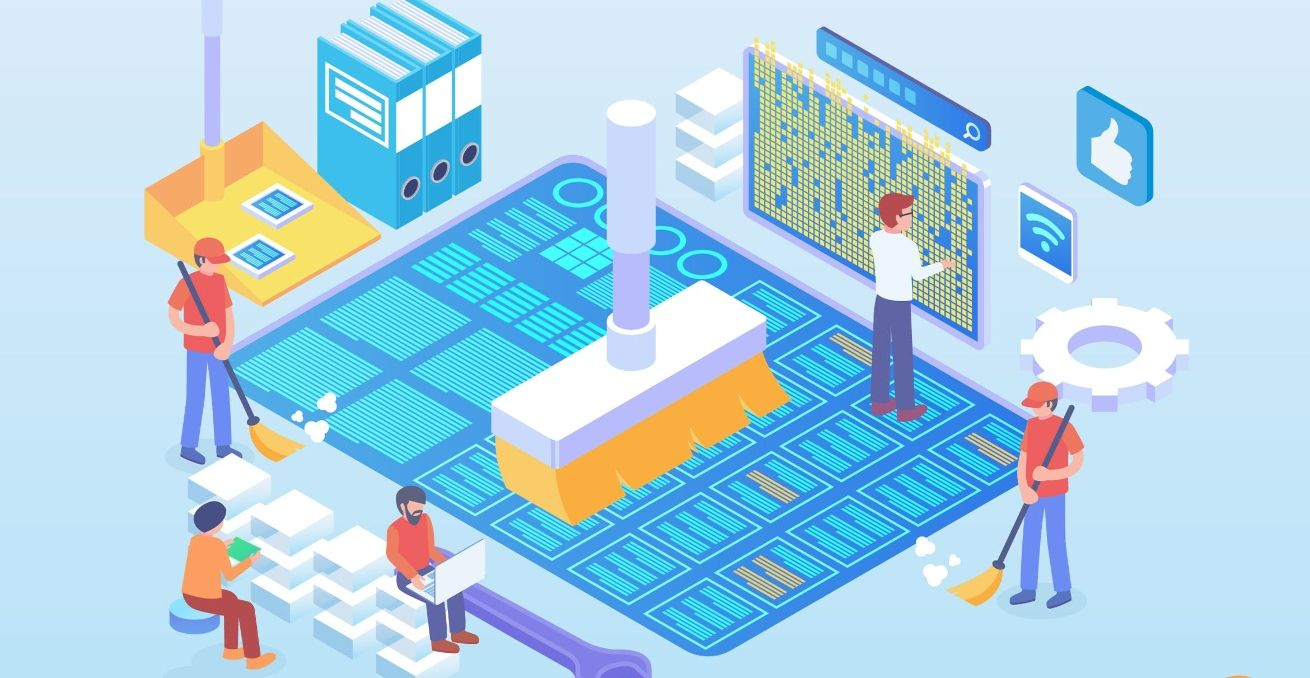

### Código


In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:

#baixando o arquivo da base de dados da Prefeitura de Porto Alegre
url = 'https://dadosabertos.poa.br/dataset/abafb264-4418-4423-b6c8-62d146ca8462/resource/8bf09aa3-15bb-4eaa-9f3e-5b0364ece6a7/download/alvaras_ativos.csv'

with requests.get(url, stream = True) as r:
  with open('alvaras_ativos', mode='wb') as arquivo:
    for chunk in r.iter_content(chunk_size = 10*1024):
        arquivo.write(chunk)
print(f'arquivo baixado')

arquivo baixado


In [3]:
#transformando o arquivo CSV em DataFrame no pacote Pandas
df = pd.read_csv('alvaras_ativos', sep= ';',encoding='utf-8')

<ipython-input-3-8d85583ced6b>:2: DtypeWarning: Columns (11,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('alvaras_ativos', sep= ';',encoding='utf-8')


Com o arquivo em mãos podemos olhar brevemente como são esses dados que temos para trabalhar.

Primeiro em uma rápida visualização das primeiras linhas e as informações gerais dos mesmos - tipo de objetos presentes, quantos valores não nulos em cada coluna e a quantidade total de linhas.

In [4]:
#um rápido olhar para os dados disponíveis
df.head(5)

,data_extracao,alvara,bairro,codigo_logradouro,logradouro,predio,data_deferimento,codigo_atividade,atividade,equipamento,...,processo_baixa_sei,data_inicio_atividade,data_emissao_alvara,data_emissao_seg_via,alvara_anterior,data_baixa,baixado,motivo,numero_boletim,mes_vencimento
0,2024-01-05,132.0,CENTRO HISTORIC,7878085.0,R MARECHAL FLORIANO PEIXOTO,38.0,1976-11-05,3.030504e+10,LABORATORIO DE PROTESE,NaN,...,NaN,1976-11-05,1976-11-05,2009-01-19,0.0,NaN,0.0,NaN,19442009.0,7.0
1,2024-01-05,1554.0,SANTA TEREZA,7973423.0,R SEPE TIARAJU,1013.0,1976-09-02,3.060201e+10,ESTABELECIMENTO DE ENSINO FORMAL DE PRIMEIRO GRAU,NaN,...,NaN,1976-11-12,2006-03-06,2006-03-06,0.0,NaN,0.0,NaN,51042006.0,7.0
2,2024-01-05,1554.0,SANTA TEREZA,7973423.0,R SEPE TIARAJU,1013.0,1976-09-02,3.060201e+10,ESTABELECIMENTO DE ENSINO FORMAL DE SEGUNDO GRAU,NaN,...,NaN,1976-11-12,2006-03-06,2006-03-06,0.0,NaN,0.0,NaN,51042006.0,7.0
3,2024-01-05,8230.0,SAO GERALDO,8280323.0,AV BENJAMIN CONSTANT,1469.0,1976-12-10,2.010213e+10,"LOJA DE VARIEDADES (VESTUARIO, CALCADOS, BRINQ...",NaN,...,NaN,1976-11-30,1976-12-10,1998-07-09,0.0,NaN,0.0,NaN,0.0,7.0
4,2024-01-05,21334.0,TRES FIGUEIRAS,8376162.0,R CARLOS HUBER,425.0,1977-02-15,3.060201e+10,ESTABELECIMENTO DE ENSINO FORMAL DE SEGUNDO GRAU,NaN,...,NaN,1977-02-15,1977-02-15,1994-05-19,0.0,NaN,0.0,NaN,0.0,7.0


In [5]:
#observando as informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186906 entries, 0 to 186905
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_extracao          186900 non-null  object 
 1   alvara                 186900 non-null  float64
 2   bairro                 186903 non-null  object 
 3   codigo_logradouro      186903 non-null  float64
 4   logradouro             186901 non-null  object 
 5   predio                 186903 non-null  float64
 6   data_deferimento       186903 non-null  object 
 7   codigo_atividade       186900 non-null  float64
 8   atividade              186900 non-null  object 
 9   equipamento            1233 non-null    object 
 10  horario                154839 non-null  object 
 11  area                   185863 non-null  object 
 12  data_vencimento        31941 non-null   object 
 13  mei                    186897 non-null  float64
 14  ponto_referencia       186898 non-nu

Com essa visão geral dos dados já podemos fazer as primeiras alterações no Dataset.

Em primeiro lugar, irei descartar as colunas que têm menos relevância para uma análise geral dos negócios da cidade ou que contenham ligações com dados externos dos quais não temos acesso público.

In [6]:
#removendo as colunas sobressalentes
df_limpando = df.drop(['data_extracao',
                  'codigo_logradouro',
                  'predio',
                  'data_deferimento',
                  'codigo_atividade',
                  'horario',
                  'area',
                  'data_vencimento',
                  'ano_processo',
                  'numero_processo',
                  'processo_sei',
                  'processo_baixa_sei',
                  'data_emissao_seg_via',
                  'alvara_anterior',
                  'data_baixa',
                  'baixado',
                  'motivo',
                  'numero_boletim',
                  'mes_vencimento'], axis= 1)

In [7]:
#vendo como ficou o DataFrame até agora
df_limpando.head(5)

,alvara,bairro,logradouro,atividade,equipamento,mei,ponto_referencia,data_inicio_atividade,data_emissao_alvara
0,132.0,CENTRO HISTORIC,R MARECHAL FLORIANO PEIXOTO,LABORATORIO DE PROTESE,NaN,0.0,2.0,1976-11-05,1976-11-05
1,1554.0,SANTA TEREZA,R SEPE TIARAJU,ESTABELECIMENTO DE ENSINO FORMAL DE PRIMEIRO GRAU,NaN,0.0,2.0,1976-11-12,2006-03-06
2,1554.0,SANTA TEREZA,R SEPE TIARAJU,ESTABELECIMENTO DE ENSINO FORMAL DE SEGUNDO GRAU,NaN,0.0,2.0,1976-11-12,2006-03-06
3,8230.0,SAO GERALDO,AV BENJAMIN CONSTANT,"LOJA DE VARIEDADES (VESTUARIO, CALCADOS, BRINQ...",NaN,0.0,2.0,1976-11-30,1976-12-10
4,21334.0,TRES FIGUEIRAS,R CARLOS HUBER,ESTABELECIMENTO DE ENSINO FORMAL DE SEGUNDO GRAU,NaN,0.0,2.0,1977-02-15,1977-02-15


Dessa forma, o conjunto de dados ficou muito mais limpo e parece ter apenas os dados mais relevantes, que é justamente o que se busca.

O alvará será mantido, pois é uma ID, importante para a identificação e diferenciação de cada objeto.

Alguns dados parecem estar fora do seu tipo ideal, neste sentido vamos olhar mais de perto quais são os tipos presentes no conjunto e analisar se eles precisam passar por transformações.

In [8]:
#analisando os tipos dos objetos para possíveis adequações
df_limpando.dtypes

alvara                   float64
bairro                    object
logradouro                object
atividade                 object
equipamento               object
mei                      float64
ponto_referencia         float64
data_inicio_atividade     object
data_emissao_alvara       object
dtype: object

Dessa forma, podemos determinar que alguns dados precisam ser alterados quanto ao seu tipo:

* a coluna "alvara" precisa ser transformada passando de uma numérica do tipo "*float*" para o tipo "*object*" (por ele ser um ID).
* a coluna "MEI" precisa ser transformada em uma variável *booleana* ("bool") para responder se aquele objeto é MEI ou não.
* da mesma maneira, a variável "ponto_referencia" também responde a uma pergunta de verdadeiro ou falso (se o objeto é ou não ambulante), e também será transformada em *booleana*("bool"), porém precisa de uma transformação adicional e, por isso, será feito na próxima etapa de transformação.
* por fim as colunas de data estão com tipos trocados, por isso "data_inicio_atividade" e "data_emissao_alvara" devem ser transformadas também.


In [9]:
df_transformando = df_limpando.astype({'alvara': 'object',
                                       'mei':'bool',
                                       'data_inicio_atividade': 'datetime64[M]',
                                       'data_emissao_alvara': 'datetime64[M]'})

Dando seguimento as transformações e melhorias nos dados, agora irei acrescentar variáveis:

* primeiro temporais para poderem existir colunas para o mês e o ano das datas de emissão de alvará e o início das atividades e, assim, possam ser feitos acompanhamentos em função do tempo, além disso, as colunas serão renomeadas para um melhor entendimento de cada uma delas.
* além disso, como havia sido mencionado, a coluna "ponto_referencia" foi alterada os valores para poderem representar valores booleanos, ou seja, Verdadeiro ou Falso. Neste caso 0 será "False" e 1 "True" para se o objeto é "ambulante".

Em seguida veremos como ficaram esses dados transformados.

In [10]:
df_transformando['ponto_referencia'] = df_limpando['ponto_referencia'].map({2: 0, 3: 1}).astype('bool')
df_transformando['inicio_ano'] = df_transformando['data_inicio_atividade'].dt.year.astype('object')
df_transformando['inicio_mes'] = df_transformando['data_inicio_atividade'].dt.month.astype('object')
df_transformando['emissao_ano'] = df_transformando['data_emissao_alvara'].dt.year.astype('object')
df_transformando['emissao_mes'] = df_transformando['data_emissao_alvara'].dt.month.astype('object')

Por fim irei alterar o nome de algumas colunas para melhor entendimento, assim como reorganizar a ordem delas. Em seguida veremos como ficaram os dados transformados no DataFrame.

In [21]:
df_transformando.rename(columns={'alvara': 'ID_alvara',
                                 'ponto_referencia': 'ambulante'}, inplace = True)
df_transformando= df_transformando.reindex(['ID_alvara',
                                            'atividade',
                                            'bairro',
                                            'logradouro',
                                            'mei',
                                            'ambulante',
                                            'equipamento',
                                            'data_inicio_atividade',
                                            'inicio_mes',
                                            'inicio_ano',
                                            'data_emissao_alvara',
                                            'emissao_mes',
                                            'emissao_ano'], axis=1 )

In [22]:
df_transformando.tail(10)

,ID_alvara,atividade,bairro,logradouro,mei,ambulante,equipamento,data_inicio_atividade,inicio_mes,inicio_ano,data_emissao_alvara,emissao_mes,emissao_ano
186896,51617064.0,ESCRITORIO DE PROMOCOES,PASSO DA AREIA,AV ASSIS BRASIL,False,False,NaN,2024-01-01,1.0,2024.0,2024-01-01,1.0,2024.0
186897,51617080.0,SEDE DE ENTIDADE DE CLASSE,PONTA GROSSA,AV PRINCIPAL DA PONTA GROSSA,False,False,NaN,2024-01-01,1.0,2024.0,2024-01-01,1.0,2024.0
186898,51617099.0,INSTITUICAO DE EDUCACAO INFANTIL (CRECHE),RESTINGA,R CAPITAO PEDROSO,False,False,NaN,2024-01-01,1.0,2024.0,2024-01-01,1.0,2024.0
186899,51617099.0,ESCOLA ESPECIAL,RESTINGA,R CAPITAO PEDROSO,False,False,NaN,2024-01-01,1.0,2024.0,2024-01-01,1.0,2024.0
186900,51617099.0,LIGA E ASSOCIACAO ASSISTENCIAL E BENEFICENTE,RESTINGA,R CAPITAO PEDROSO,False,False,NaN,2024-01-01,1.0,2024.0,2024-01-01,1.0,2024.0
186901,51617102.0,INSTITUICAO DE EDUCACAO INFANTIL (CRECHE),RESTINGA,AV DR JOAO DENTICE,False,False,NaN,2024-01-01,1.0,2024.0,2024-01-01,1.0,2024.0
186902,51617110.0,ESCOLA ESPECIAL,RESTINGA,AV LUIZ FRANCISCO ZANELLA,False,False,NaN,2024-01-01,1.0,2024.0,2024-01-01,1.0,2024.0
186903,51617145.0,MATERIAL ODONTOLOGICO,CRISTO REDENTOR,R ADAO BAINO,False,False,NaN,2024-01-01,1.0,2024.0,2024-01-01,1.0,2024.0
186904,88400336.0,"FOTOCOPIAS, COPIAS HELIOGRAFICAS E PLASTIFICACAO",CAVALHADA,AV DA CAVALHADA,False,False,NaN,2010-11-01,11.0,2010.0,2010-11-01,11.0,2010.0
186905,88400700.0,"OFICINA DE REPARACAO DE INSTALACOES ELETRICAS,...",FLORESTA,AV ALBERTO BINS,False,False,NaN,2010-11-01,11.0,2010.0,2010-11-01,11.0,2010.0


Com os tipos de dados certos, colunas reorganizadas e dados adequados, podemos analisar a consistência dos dados, nesse caso se existem valores vazios no conjunto de dados.

No caso das colunas que existirem dados faltantes, vamos usar uma fórmula para calcular a porcentagem desses dados, para que assim possa ser decidido o melhor caminho a seguir para o tratamento desses dados.

In [13]:
#verificando a existência de valores faltantes
df_transformando.isna().any()

ID_alvara                 True
bairro                    True
logradouro                True
atividade                 True
equipamento               True
mei                      False
ambulante                False
data_inicio_atividade     True
data_emissao_alvara       True
inicio_ano                True
inicio_mes                True
emissao_ano               True
emissao_mes               True
dtype: bool

In [15]:
#verificando a quantidade relativa dos valores faltantes
ID_alvara = 100 *(df_transformando["ID_alvara"].isna().sum() / len(df_transformando))
bairro = 100 * (df_transformando["bairro"].isna().sum() / len(df_transformando))
logradouro = 100 * (df_transformando["logradouro"].isna().sum() / len(df_transformando))
atividade = 100 * (df_transformando["atividade"].isna().sum() / len(df_transformando))
equipamento = 100 * (df_transformando["equipamento"].isna().sum() / len(df_transformando))
data_inicio = 100 * (df_transformando["data_inicio_atividade"].isna().sum() / len(df_transformando))
emissao_alvara = 100 * (df_transformando["data_emissao_alvara"].isna().sum() / len(df_transformando))

print(f'alvara: {ID_alvara.round(3)}%')
print(f'bairro: {bairro.round(3)}%')
print(f'logradouro: {logradouro.round(3)}%')
print(f'atividade: {atividade.round(3)}%')
print(f'equipamento: {equipamento.round(3)}%')
print(f'data_inicio: {data_inicio.round(3)}%')
print(f'emissao_alvara: {emissao_alvara.round(3)}%')

alvara: 0.003%
bairro: 0.002%
logradouro: 0.003%
atividade: 0.003%
equipamento: 99.34%
data_inicio: 0.803%
emissao_alvara: 0.005%


Como podemos ver, o número de valores nulos é muito baixo em quase todas as colunas, ou seja, eles não devem atrapalhar uma análise ou modelo.

No entanto, a coluna "equipamento" apresenta um número grande de valores vazios, o que explica isto? Para entender isso devemos olhar para o dado e entender o que ele quer representar. Neste caso a coluna equipamento diz respeito somente aos objetos tidos como "ambulante", nesse caso, o baixo preenchimento corresponde com essa coluna e, então, o dado não deve ser considerado como problema.

Sendo assim podemos seguir, garantindo que os dados vazios sejam preenchidos somente com 'NaN'.

In [23]:
df_transformando.fillna('NaN')

,ID_alvara,atividade,bairro,logradouro,mei,ambulante,equipamento,data_inicio_atividade,inicio_mes,inicio_ano,data_emissao_alvara,emissao_mes,emissao_ano
0,132.0,LABORATORIO DE PROTESE,CENTRO HISTORIC,R MARECHAL FLORIANO PEIXOTO,False,False,NaN,1976-11-01,11.0,1976.0,1976-11-01,11.0,1976.0
1,1554.0,ESTABELECIMENTO DE ENSINO FORMAL DE PRIMEIRO GRAU,SANTA TEREZA,R SEPE TIARAJU,False,False,NaN,1976-11-01,11.0,1976.0,2006-03-01,3.0,2006.0
2,1554.0,ESTABELECIMENTO DE ENSINO FORMAL DE SEGUNDO GRAU,SANTA TEREZA,R SEPE TIARAJU,False,False,NaN,1976-11-01,11.0,1976.0,2006-03-01,3.0,2006.0
3,8230.0,"LOJA DE VARIEDADES (VESTUARIO, CALCADOS, BRINQ...",SAO GERALDO,AV BENJAMIN CONSTANT,False,False,NaN,1976-11-01,11.0,1976.0,1976-12-01,12.0,1976.0
4,21334.0,ESTABELECIMENTO DE ENSINO FORMAL DE SEGUNDO GRAU,TRES FIGUEIRAS,R CARLOS HUBER,False,False,NaN,1977-02-01,2.0,1977.0,1977-02-01,2.0,1977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186901,51617102.0,INSTITUICAO DE EDUCACAO INFANTIL (CRECHE),RESTINGA,AV DR JOAO DENTICE,False,False,NaN,2024-01-01,1.0,2024.0,2024-01-01,1.0,2024.0
186902,51617110.0,ESCOLA ESPECIAL,RESTINGA,AV LUIZ FRANCISCO ZANELLA,False,False,NaN,2024-01-01,1.0,2024.0,2024-01-01,1.0,2024.0
186903,51617145.0,MATERIAL ODONTOLOGICO,CRISTO REDENTOR,R ADAO BAINO,False,False,NaN,2024-01-01,1.0,2024.0,2024-01-01,1.0,2024.0
186904,88400336.0,"FOTOCOPIAS, COPIAS HELIOGRAFICAS E PLASTIFICACAO",CAVALHADA,AV DA CAVALHADA,False,False,NaN,2010-11-01,11.0,2010.0,2010-11-01,11.0,2010.0


Por fim, vamos olhar um pouco mais a fundo o que cada dado representa e analisar se os dados são muito discrepantes ou fogem da realidade em algum aspecto. Para isso será utilizado o método "describe" para ter uma noção geral de cada tipo de objeto, isso é útil para se ter uma ideia sobre a distribuição dos campos de dados e outliers, se houver - além disso, ela exclui os dados NaN.

In [24]:
df_transformando.select_dtypes("object").describe().transpose()

,count,unique,top,freq
ID_alvara,186900.0,90205.0,50471368.0,10.0
atividade,186900,974,"PROFISSIONAL LIBERAL,TECNICO E UNIVERSITARIO",10864
bairro,186903,99,CENTRO HISTORIC,22472
logradouro,186901,2930,AV ASSIS BRASIL,6636
equipamento,1233,46,ESTANDE PADRÃO 2M X 1M,234
inicio_mes,185405.0,12.0,8.0,17788.0
inicio_ano,185405.0,65.0,2023.0,37751.0
emissao_mes,186897.0,12.0,8.0,18133.0
emissao_ano,186897.0,62.0,2023.0,37738.0


In [18]:
df_transformando.select_dtypes("bool").describe().transpose()

,count,unique,top,freq
mei,186906,2,False,185569
ambulante,186906,2,False,185665


Com tudo finalizado e estando conforme o esperado, é chegado o momento de olhar mais uma vez para o DataFrame final e salvá-lo em um arquivo CSV para que ele possa ser utilizado em outras plataformas/aplicações.

In [25]:
#observando como ficaram os dados limpos e transformados
df_final = df_transformando
df_final.head(5)

,ID_alvara,atividade,bairro,logradouro,mei,ambulante,equipamento,data_inicio_atividade,inicio_mes,inicio_ano,data_emissao_alvara,emissao_mes,emissao_ano
0,132.0,LABORATORIO DE PROTESE,CENTRO HISTORIC,R MARECHAL FLORIANO PEIXOTO,False,False,NaN,1976-11-01,11.0,1976.0,1976-11-01,11.0,1976.0
1,1554.0,ESTABELECIMENTO DE ENSINO FORMAL DE PRIMEIRO GRAU,SANTA TEREZA,R SEPE TIARAJU,False,False,NaN,1976-11-01,11.0,1976.0,2006-03-01,3.0,2006.0
2,1554.0,ESTABELECIMENTO DE ENSINO FORMAL DE SEGUNDO GRAU,SANTA TEREZA,R SEPE TIARAJU,False,False,NaN,1976-11-01,11.0,1976.0,2006-03-01,3.0,2006.0
3,8230.0,"LOJA DE VARIEDADES (VESTUARIO, CALCADOS, BRINQ...",SAO GERALDO,AV BENJAMIN CONSTANT,False,False,NaN,1976-11-01,11.0,1976.0,1976-12-01,12.0,1976.0
4,21334.0,ESTABELECIMENTO DE ENSINO FORMAL DE SEGUNDO GRAU,TRES FIGUEIRAS,R CARLOS HUBER,False,False,NaN,1977-02-01,2.0,1977.0,1977-02-01,2.0,1977.0


In [27]:
#salvando o DataFrame em CSV para ser utilizado em outras plataformas
df_final.to_csv('alvaras_ativos_PoA.csv', index=False)
print('arquivo salvo')

arquivo salvo


O arquivo final foi disponibilizado em forma de Dataset na plataforma Kaggle, disponível neste [link](https://www.kaggle.com/datasets/brunoguedesf/alvars-ativos-em-porto-alegre-012024/data) para quem tenha interesse em utilizá-lo.

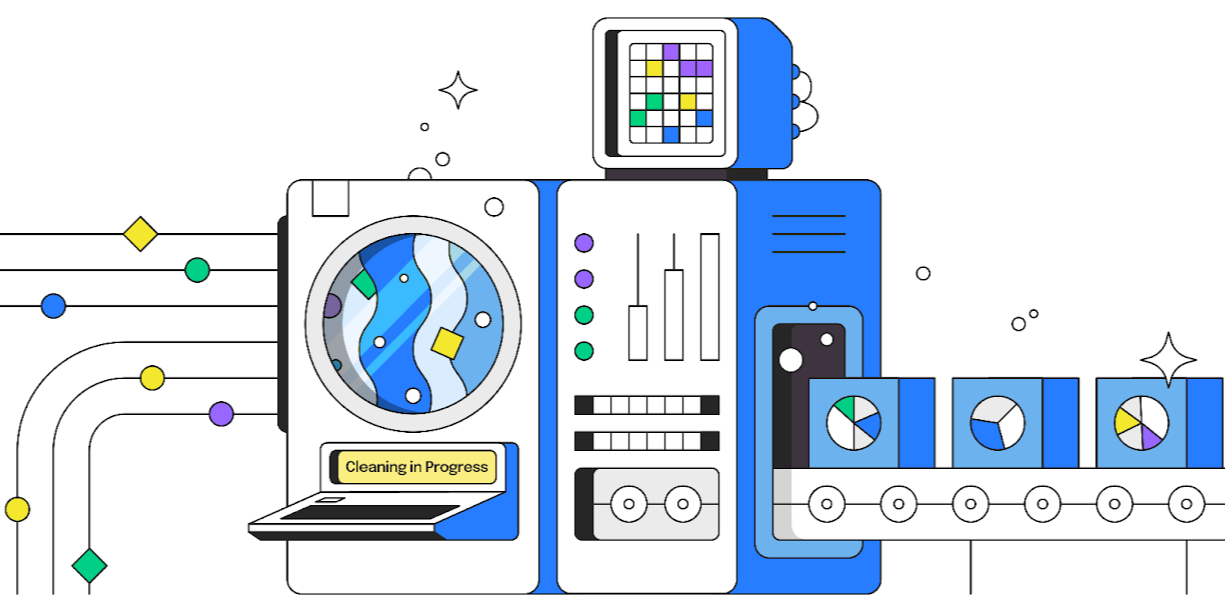

## CONCLUSÃO

No final deste projeto de limpeza de dados foi possível demonstrar alguns métodos bastante utilizados em um conjunto de dados real com verdadeira usabilidade, e pode ser replicado em outros projetos ou para continuar atualizando de forma automática esse mesmo conjunto de dados - que sofre atualizações periódicas pelo órgão governamental responsável.

Sem querer esgotar as possibilidades das ferramentas aqui utilizadas, espero ter demonstrado como é possível ser feita de forma clara e precisa a limpeza em um conjunto de dados grande de forma eficiente.

As etapas que poderiam se dar a seguir, como, por exemplo, a criação de um Dashboard ou a extração de estatísticas de interesse, dependeriam primordialmente da clareza e eficiência desta etapa e acredito que este objetivo tenha sido atingido.